### Plot lower triangle of scatter mattrix

A scatter mattrix plot is usefull when we need to visualize bivariate relationships between combinations of variables.  
The scatter mattrix plot is divided in two triangles, upper and lower. When plotting sensor values, the triangles are symmetric, so plotting only the lower one makes sense.

Let's assume we need to plot all the possible combinations between 7 sensors and a reference one. We will generate random data and use seaborn's Pairgrid library for the scatter mattrix plot.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

cols="ref sens1 sens2 sens3 sens4 sens5 sens6 sens7".split()

df = pd.DataFrame(np.random.rand(253, 8) * 25, columns=cols)

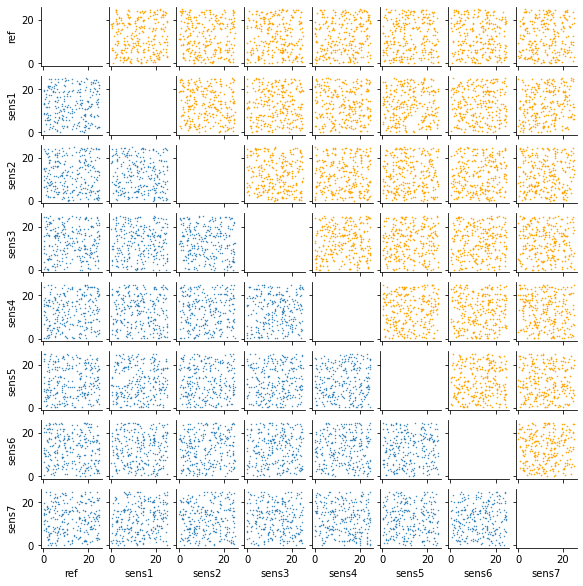

In [2]:
def scatter_matrix(df):
    """ Plots scatter matrix """
    grid = sns.PairGrid(data=df, vars=list(df), height=1)
    grid = grid.map_lower(plt.scatter, s=0.2)
    grid = grid.map_upper(plt.scatter, s=0.4, color="orange")
    grid.set(alpha=1)
scatter_matrix(df)

We will add a for loop to our function to iterate over the upper triangle indices and hide them. The grid.map_upper(...) is not necessary now. 

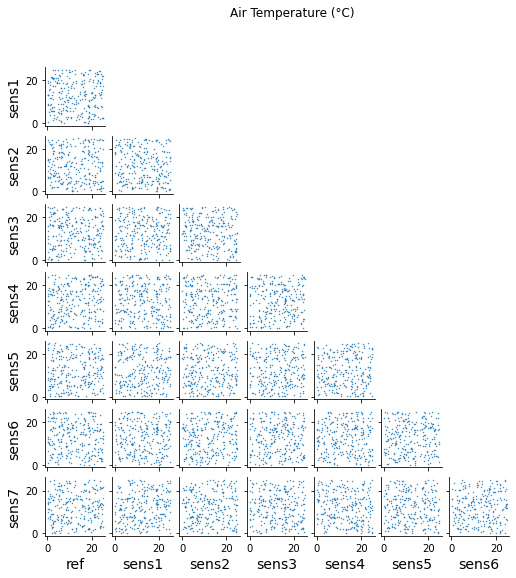

In [3]:
def scatter_matrix_lower(df):
    """ Plots lower triangle of scatter matrix """
    grid = sns.PairGrid(data=df, vars=list(df), height=1)
    for m, n in zip(*np.triu_indices_from(grid.axes, k=0)):
        grid.axes[m, n].set_visible(False)
    grid = grid.map_lower(plt.scatter, s=0.2)
    grid = grid.map_upper(plt.scatter, s=0.2)
    grid.set(alpha=1)
    grid.fig.suptitle('Air Temperature (°C)')
plt.rcParams["axes.labelsize"] = 14
scatter_matrix_lower(df)

Optionally we may add Pearson's R annotation or slope and intercept anotation to our plots.

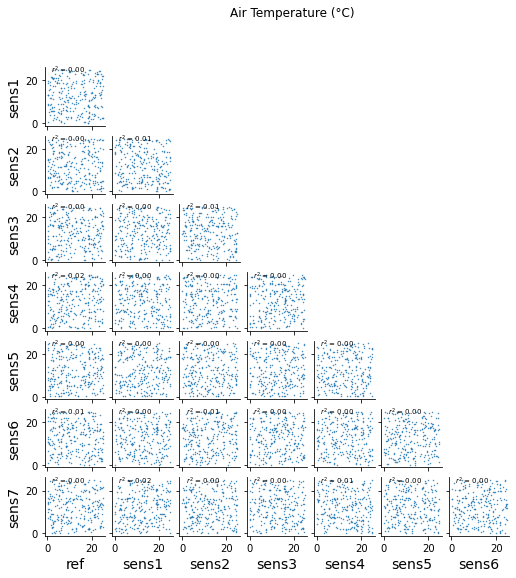

In [4]:
def scatter_matrix_lower(df):
    """ Plots lower triangle of scatter matrix """

    def corrfunc(x, y, **kwargs):
        """ Calculates Pearson's R and annotates axis
        Use on seaborn scatter matrix"""
        r, _ = stats.pearsonr(x, y)
        r2 = r ** 2
        ax = plt.gca()
        ax.annotate("$r^2$ = {:.2f}".format(r2),
                    xy=(.1, .9), xycoords=ax.transAxes, fontsize='x-small')

    def slope_intercept(x, y, **kwargs):
        """ Calculates slope + intercept and annotates axis
        Use on seaborn scatter matrix"""
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        ax = plt.gca()
        ax.annotate("y={0:.1f}x+{1:.1f}".format(slope, intercept),
                    xy=(.1, .9), xycoords=ax.transAxes, fontsize='x-small')

    grid = sns.PairGrid(data=df, vars=list(df), height=1)
    for m, n in zip(*np.triu_indices_from(grid.axes, k=0)):
        grid.axes[m, n].set_visible(False)
    grid = grid.map_lower(plt.scatter, s=0.2)
    grid.map_lower(corrfunc)
    grid.set(alpha=1)
    grid.fig.suptitle('Air Temperature (°C)')
plt.rcParams["axes.labelsize"] = 14
scatter_matrix_lower(df)